<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

# ***Pie Charts, Box Plots, Scatter Plots, and Bubble Plots.***

Estimated time needed: **30** minutes

## ***Objectives.***

After completing this lab you will be able to:

*   Explore Matplotlib library further.
*   Create pie charts, box plots, scatter plots and bubble charts.


$ \ $

-----

## ***Table of Contents.***

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Exploring Datasets with *p*andas](#0)<br>
2.  [Downloading and Prepping Data](#2)<br>
3.  [Visualizing Data using Matplotlib](#4) <br>
4.  [Pie Charts](#6) <br>
5.  [Box Plots](#8) <br>
6.  [Scatter Plots](#10) <br>
7.  [Bubble Plots](#12) <br>

</div>


$ \ $

-----

# ***Exploring Datasets with pandas and Matplotlib.***

$ \ $

* ***`Toolkits (Juegos de herramientas:):`*** The course heavily relies on [*pandas*](http://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2022-01-01) and [**Numpy**](http://www.numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2022-01-01) for data wrangling, analysis, and visualization. The primary plotting library we will explore in the course is [Matplotlib](http://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2022-01-01).

$ \ $

* ***`Dataset:`*** Immigration to Canada from 1980 to 2013 - [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2022-01-01) from United Nation's website.

$ \ $

> The dataset contains annual data on the flows of international migrants as recorded by the countries of destination. The data presents both inflows and outflows (entradas y salidas) according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. In this lab, we will focus on the Canadian Immigration data.


$ \ $

-----

# ***Downloading and Prepping Data.***

$(1)$ The first thing we'll do is install **openpyxl** (formerly **xlrd**), a module that *pandas* requires to read Excel files (if it is not possible, no problem because in contrary case it is installed by defect).



In [ ]:
!mamba install openpyxl==3.0.9 -y

/bin/bash: mamba: command not found


$ \ $


$(2)$ Import primary modules.


In [ ]:
# useful for many scientific computing in Python
import numpy as np

# primary data structure library
import pandas as pd 

$ \ $


$(3)$ Download the Canadian Immigration dataset and read it into a *pandas* dataframe.


In [ ]:
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2
    )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


$ \ $


$(4)$ Let's take a look at the first five items in our dataset.


In [ ]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


$ \ $


$(5)$ Let's find out how many entries there are in our dataset.


In [ ]:
# print the dimensions of the dataframe
print(df_can.shape)

(195, 43)


$ \ $


$(6)$ Clean up data. We will make some modifications to the original dataset to make it easier to create our visualizations. 


In [ ]:
#(1) Borrar algunas columnas que no seran necesarias.
columnas = ['AREA', 'REG', 'DEV', 'Type', 'Coverage']
(df_can).drop(columnas, axis=1, inplace=True)

#(2) Renombramos algunas columnas.
dic_columnas = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}
df_can.rename(columns=dic_columnas, inplace=True)

#(3) for sake of consistency, let's also make all column labels of type string
(df_can).columns = list(map(str, df_can.columns))

#(4) set the country name as index - useful for quickly looking up countries using .loc method
(df_can).set_index('Country', inplace=True)

#(5) add total column
df_can['Total'] = df_can.sum(axis=1)

#(6) years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print("Data dimensions:", df_can.shape)

Data dimensions: (195, 38)


<ipython-input-6-1c2ff5888b76>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


$ \ $

-----

# ***Visualizing Data using Matplotlib.***

We import `Matplotlib`.


In [ ]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

#optional: for ggplot-like style
mpl.style.use('ggplot') 


$ \ $ 

### ***Nota (% matplotlib inline).***

El comando Matplotlib Inline es un comando mágico que hace que los gráficos generados por matplotlib se muestren en el shell de IPython que estamos ejecutando y no en una ventana de salida separada. Los diferentes IDE de IPython ofrecen una representación ligeramente diferente de los gráficos generados con matplotlib.

$ \ $

-----

# ***Pie Charts.***

A `pie chart` is a circular graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices. You are most likely already familiar with pie charts as it is widely used in business and media. We can create pie charts in Matplotlib by passing in the `kind=pie` keyword.



$ \ $

## ***Example (pie charts).***

Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013. For do this, we will have the following steps:


$\color{yellow}{\text{Step 1:}}$  Gather data (reunir datos).

We will use *pandas* groupby method to summarize the immigration data by `Continent`. The general process of `groupby` involves the following things:

$(1)$  **Split:** Splitting the data into groups based on some criteria.

$(2)$   **Apply:** Applying a function to each group independently:
    .sum()
    .count()
    .mean()
    .std()
    .aggregate()
    .apply()
    .etc.
    
$(3)$   **Combine:** Combining the results into a data structure.


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig4SplitApplyCombine.png" height=400 align="center">


In [ ]:
#(1) group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()

df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


$ \ $

$\color{yellow}{\text{Step 2:}}$ Plot the data. We will pass in `kind = 'pie'` keyword, along with the following additional parameters:

$ \ $

*   `autopct` -  is a string or function used to label the wedges (porciones) with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be `fmt%pct`.

$ \ $

*   `startangle` - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.

$ \ $


*   `shadow` - Draws a shadow beneath the pie (to give a 3D feel).


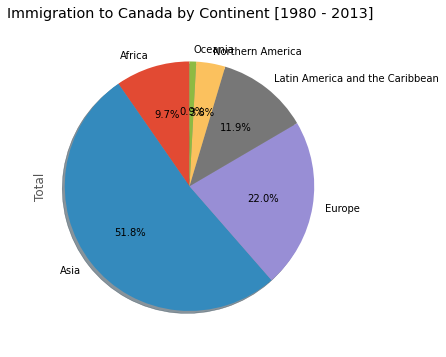

In [ ]:
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize = (5, 6),
                            autopct = '%1.1f%%', # add in percentages
                            startangle = 90,     # start angle 90° (Africa)
                            shadow = True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

$ \ $

-----

## ***Note (previous example / pie charts).***

The above visual is not very clear, the numbers and text overlap in some instances. Let's make a few modifications to improve the visuals:

$ \ $

*   Remove the text labels on the pie chart by passing in `legend` and add it as a seperate legend using `plt.legend()`.

$ \ $

*   Push out the percentages to sit just outside the pie chart by passing in `pctdistance` parameter.

$ \ $

*   Pass in a custom set of colors for continents by passing in `colors` parameter.

$ \ $

*   **Explode** the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Caribbean) by passing in `explode` parameter.


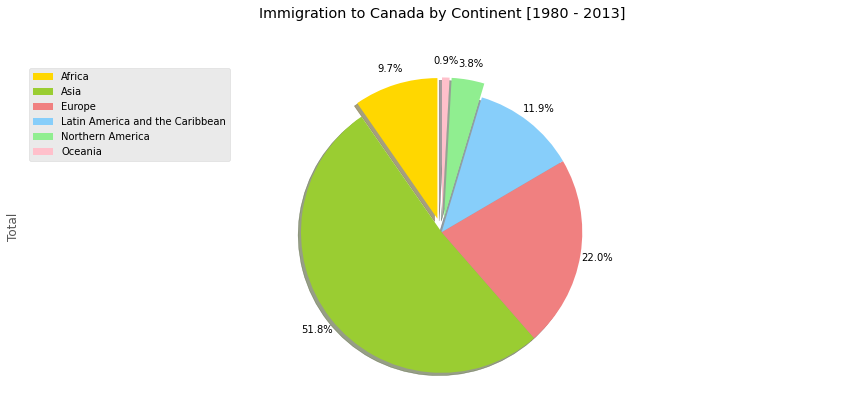

In [ ]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset (compensar) each wedge.

df_continents['Total'].plot(kind = 'pie',
                            figsize = (15, 6),
                            autopct = '%1.1f%%', 
                            startangle = 90,    
                            shadow = True,       
                            labels = None,         # turn off labels on pie chart
                            pctdistance = 1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors = colors_list,  # add custom colors
                            explode = explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels = df_continents.index, loc='upper left') 

plt.show()

$ \ $

------

## ***Question (pie chart).***

Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

***`Note`***: You might need to play with the explore values in order to fix any overlapping slice values.


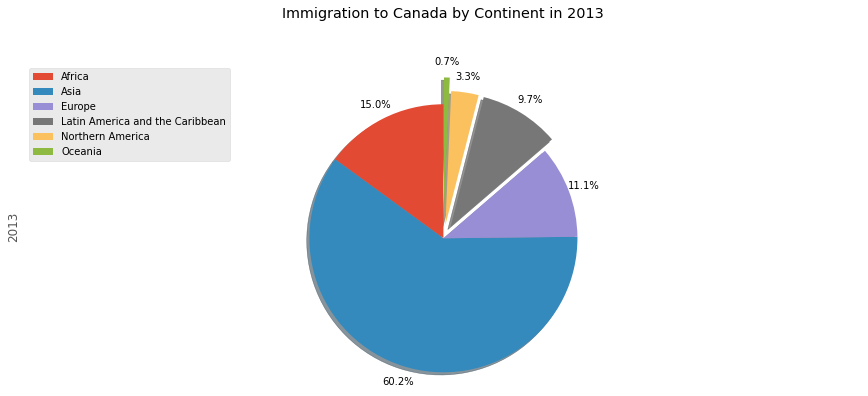

In [ ]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink'] # esta es la lista de colores pero no los usaremos ya que python pone los colores por defecto diferentes
explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2] # ratio for each continent with which to offset each wedge.

df_continents['2013'].plot(kind = 'pie',
                           figsize = (15, 6),
                           autopct = '%1.1f%%', 
                           startangle = 90,    
                           shadow = True,       
                           labels = None,                 # turn off labels on pie chart
                           pctdistance = 1.12,            # the ratio between the pie center and start of text label
                           explode = explode_list         # 'explode' lowest 3 continents
                           )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent in 2013', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

# show plot
plt.show()


<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:
    explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2] # ratio for each continent with which to offset each wedge.

    df_continents['2013'].plot(kind='pie',
                                figsize=(15, 6),
                                autopct='%1.1f%%', 
                                startangle=90,    
                                shadow=True,       
                                labels=None,                 # turn off labels on pie chart
                                pctdistance=1.12,            # the ratio between the pie center and start of text label
                                explode=explode_list         # 'explode' lowest 3 continents
                                )

    # scale the title up by 12% to match pctdistance
    plt.title('Immigration to Canada by Continent in 2013', y=1.12) 
    plt.axis('equal') 

    # add legend
    plt.legend(labels=df_continents.index, loc='upper left') 

    # show plot
    plt.show()

```

</details>


$ \ $

-----

# ***Box Plots.***

A `box plot` is a way of statistically representing the $\color{yellow}{\text{distribution of the data}}$  through five main dimensions:

$ \ $

*   **Minimum:** The smallest number in the dataset excluding the outliers.

$ \ $

*   **First quartile:** Middle number between the `minimum` and the `median`.

$ \ $

*   **Second quartile (Median):** Middle number of the (sorted) dataset.

$ \ $

*   **Third quartile:** Middle number between `median` and `maximum`.

$ \ $

*   **Maximum:** The largest number in the dataset excluding the outliers.


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/boxplot_complete.png" width=440, align="center">


To make a `boxplot`, we can use `kind=box` in `plot` method invoked on a *pandas* series or dataframe.




$ \ $


-----

# ***Example (boxplot).***

$ \ $


Let's plot the box plot for the Japanese immigrants between 1980 - 2013. For do that we have the following steps:

$ \ $


$\color{yellow}{\text{Step 1:}}$ Get the subset of the dataset. Even though we are extracting the data for just one country, we will obtain it as a dataframe. This will help us with calling the `dataframe.describe()` method to view the percentiles.


In [ ]:
# to get a dataframe, place extra square brackets around 'Japan'.
japon = df_can.loc[['Japan'], years]
japon

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Japan,701,756,598,309,246,198,248,422,324,494,...,973,1067,1212,1250,1284,1194,1168,1265,1214,982


In [ ]:
df_japan = japon.transpose()
df_japan

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246
1985,198
1986,248
1987,422
1988,324
1989,494


$ \ $

$\color{yellow}{\text{Step 2:}}$ Plot by passing in `kind='box'`.


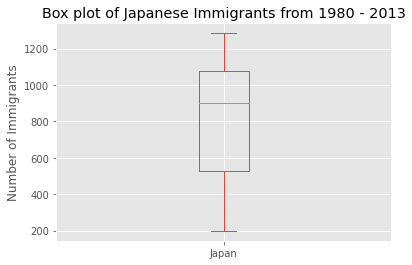

In [ ]:
# df_japan.plot(kind='box', figsize=(8, 6))  ajustamos el tamaño.

#(1) Creamos el plot.
df_japan.plot(kind='box')

#(2) Ponemos el titulo al plot y al eje y, ya que es un plot vertical
plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

#(3) Mostramos en pantalla el plot
plt.show()

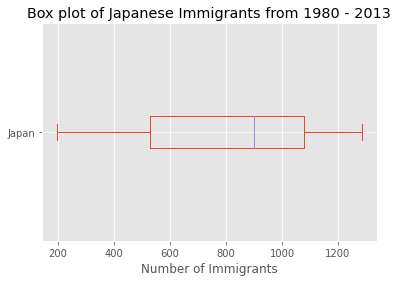

In [ ]:
# df_japan.plot(kind='box', figsize=(8, 6))  ajustamos el tamaño.

#(1) Creamos el plot.
df_japan.plot(kind='box', vert=False)

#(2) Ponemos el titulo al plot y al eje y, ya que es un plot vertical
plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.xlabel('Number of Immigrants')

#(3) Mostramos en pantalla el plot
plt.show()

We can immediately make a few key observations from the plot above:


$(1)$ The minimum number of immigrants is around 200 (min), maximum number is around 1300 (max), and  median number of immigrants is around 900 (median).

$ \ $


$(2)$ 25% of the years for period 1980 - 2013 had an annual immigrant count of \~500 or fewer (First quartile).

$ \ $


$(3)$ 75% of the years for period 1980 - 2013 had an annual immigrant count of \~1100 or fewer (Third quartile).




$ \ $

----

## ***Example (verification of the previous results / boxplot).***

We can view the actual numbers by calling the `describe()` method on the dataframe.

In [ ]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


$ \ $

----

## ***Note (boxplots).***

One of the key benefits of box plots is comparing the distribution of multiple datasets. 




$ \ $

-----

## ***Example (boxplots)***

Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013 using the following steps:

$ \ $

$\color{yellow}{\text{Step 1:}}$ Get the dataset for China and India and call the dataframe **df_CI**.


In [ ]:
data_china_india = df_can.loc[['China', 'India'], years]
data_china_india

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


In [ ]:
df_CI= df_can.loc[['China', 'India'], years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:
    df_CI= df_can.loc[['China', 'India'], years].transpose()
    df_CI.head()
```

</details>


$ \ $

$\color{yellow}{\text{Step 2:}}$ Let's view the percentiles associated with both countries using the `describe()` method.


In [ ]:
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:
    df_CI.describe()
```

</details>


$ \ $

$\color{yellow}{\text{Step 3:}}$ Plot data using a boxplot.


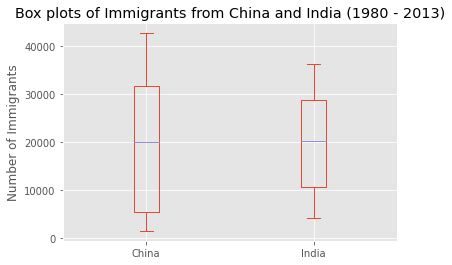

In [ ]:
# df_CI.plot(kind='box', figsize=(10, 7)
#(1) we create the boxplot object
df_CI.plot(kind='box')

#(2) We put the title and the label
plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.ylabel('Number of Immigrants')

#(3) we show on the screen
plt.show()



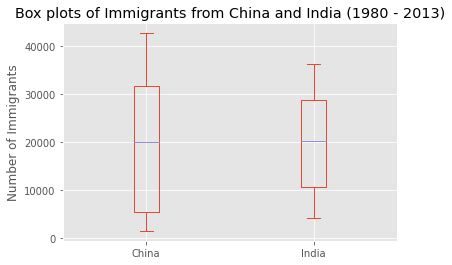

In [ ]:
# df_CI.plot.box(figsize=(10, 7))
#(1) we create the boxplot object
df_CI.plot.box()

#(2) We put the title and the label
plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.ylabel('Number of Immigrants')

#(3) we show on the screen
plt.show()

<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:
    df_CI.plot(kind='box', figsize=(10, 7))

    plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
    plt.ylabel('Number of Immigrants')

    plt.show()

```

</details>


We can observe that, while both countries have around the same median immigrant population (\~20,000),  China's immigrant population range is more spread out than India's. The maximum population from India for any year (36,210) is around 15% lower than the maximum population from China (42,584).


$ \ $

-----

## ***Example (horizontal boxplots)***

If you prefer to create horizontal box plots, you can pass the `vert` parameter in the **plot** function and assign it to *False*. You can also specify a different color in case you are not a big fan of the default red color.


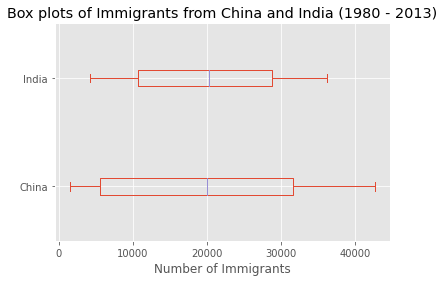

In [ ]:
# df_CI.plot(kind='box', vert=False)
# df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)
df_CI.plot.box(vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

$ \ $

-----

# ***Subplots.***

Often times we might want to plot $\color{yellow}{\text{multiple plots within the same figure}}$. For example, we might want to perform a side by side comparison of the box plot with the line plot of China and India's immigration. 
To visualize multiple plots together, we do the following things:

* We create a **`figure`** (overall canvas).


* We divide it into **`subplots`**, each containing a plot.


Typical syntax is : <br>

```python
fig = plt.figure() # create figure
ax = fig.add_subplot(number_rows, number_cols, plot_number) # create subplots
```

Where

*   `number_rows` and `number_cols` are used to notionally split the figure into (`number_rows` \* `number_cols`) sub-axes,
*   `plot_number` is used to identify the particular subplot that this function is to create within the notional grid. `plot_number` starts at 1, increments across rows first and has a maximum of `number_rows` \* `number_cols` as shown below.

$ \ $

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig5Subplots_V2.png" width=500 align="center">


$ \ $

-----

## ***Example (subplots)***

We can then specify which subplot to place each plot by passing in the `ax` paramemter in `plot()` method as follows:


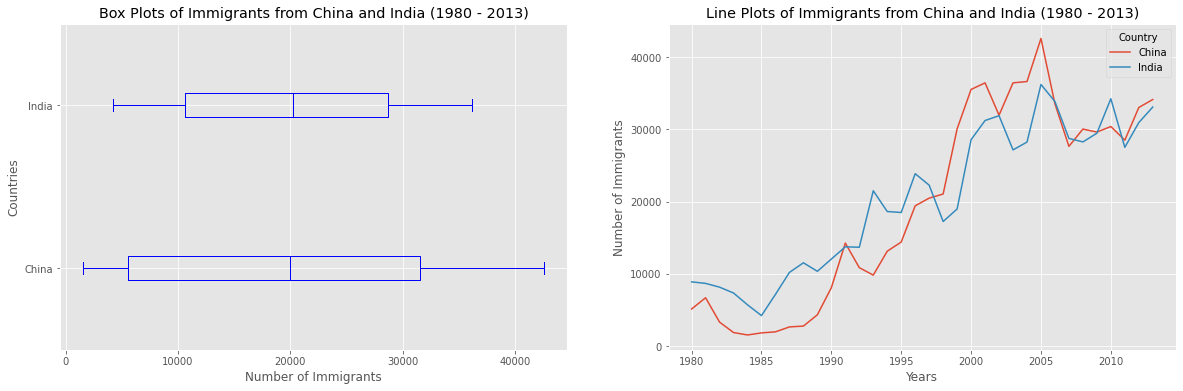

In [ ]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

$ \ $

-----

## ***Tip regarding subplots convention (another notation).***


In the case when `nrows`, `ncols`, and `plot_number` are all less than 10, a convenience exists such that a 3-digit number can be given instead, where the hundreds represent `nrows`, the tens represent `ncols` and the units represent `plot_number`. For instance,

```python
subplot(211) == subplot(2, 1, 1) 
```

produces a subaxes in a figure which represents the top plot (i.e. the first) in a 2 rows by 1 column notional grid (no grid actually exists, but conceptually this is how the returned subplot has been positioned).


$ \ $

----

## ***Example (subplots).***

Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the *decades* 1980s, 1990s, and 2000s. To do this we have the following steps:

$ \ $

$\color{yellow}{\text{Step 1:}}$ Get the dataset. Get the top 15 countries based on ***`Total`*** immigrant population. Name the dataframe **df_top15**.



In [ ]:
df_top15 = df_can.sort_values(['Total'], ascending=False, axis=0).head(15)
df_top15.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962


<details><summary>Click here for a sample python solution</summary>

```python
#The correct answer is:
df_top15 = df_can.sort_values(['Total'], ascending=False, axis=0).head(15)
df_top15

```

</details>


$ \ $

$\color{yellow}{\text{Step 2:}}$ Create a new dataframe which contains the aggregate for each decade. One way to do that:

1.  Create a list of all years in decades 80's, 90's, and 00's.
2.  Slice the original dataframe df_can to create a series for each decade and sum across all years for each country.
3.  Merge the three series into a new data frame. Call your dataframe **new_df**.


In [ ]:
#(1) create a list of all years in decades 80's, 90's, and 00's
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010))) 

#(2) slice the original dataframe df_can to create a series for each decade
df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

#(3) We show the result of 80's
df_80s

Country
India                                                    82154
China                                                    32003
United Kingdom of Great Britain and Northern Ireland    179171
Philippines                                              60764
Pakistan                                                 10591
United States of America                                 76824
Iran (Islamic Republic of)                               21477
Sri Lanka                                                14796
Republic of Korea                                        16259
Poland                                                   57602
Lebanon                                                  24918
France                                                   17137
Jamaica                                                  34328
Viet Nam                                                 30638
Romania                                                   7613
dtype: int64

In [ ]:
#(1) merge the three series into a new data frame
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 

#(2) display dataframe
new_df.head()


,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


<details><summary>Click here for a sample python solution</summary>

```python
#The correct answer is:
    
# create a list of all years in decades 80's, 90's, and 00's
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010))) 

# slice the original dataframe df_can to create a series for each decade
df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

# merge the three series into a new data frame
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 

# display dataframe
new_df.head()
```

</details>


Let's learn more about the statistics associated with the dataframe using the `describe()` method.


In [ ]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


<details><summary>Click here for a sample python solution</summary>

```python
#The correct answer is:    
new_df.describe()
```

</details>


$ \ $

$\color{yellow}{\text{Step 4:}}$ Plot the box plots.


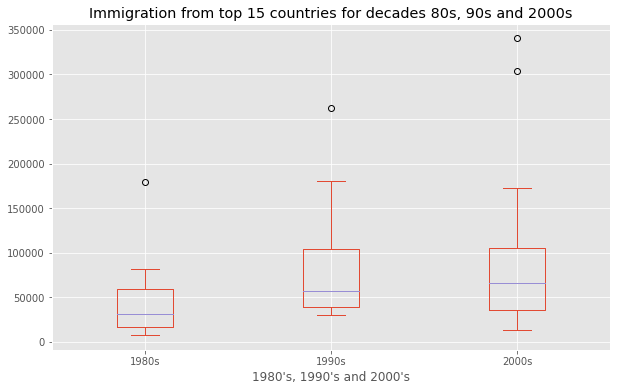

In [ ]:
new_df.plot.box(figsize=(10, 6))

plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')
plt.xlabel("1980's, 1990's and 2000's")
plt.show()

<details><summary>Click here for a sample python solution</summary>

```python
#The correct answer is:    
new_df.plot(kind='box', figsize=(10, 6))

plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')

plt.show()

```

</details>


$ \ $

Note how the box plot differs from the summary table created. The box plot scans the data and identifies the outliers. In order to be an outlier, the data value must be:<br>

*   larger than Q3 by at least 1.5 times the interquartile range (IQR), or,
*   smaller than Q1 by at least 1.5 times the IQR.

Let's look at decade ***`2000s`*** as an example: <br>

*   Q1 (25%) = 36,101.5 <br>
*   Q3 (75%) = 105,505.5 <br>
*   IQR = Q3 - Q1 = 69,404 <br>

Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.

Outlier > 105,505.5 + (1.5 \* 69,404) <br>
Outlier > 209,611.5


$ \ $

$\color{yellow}{\text{Step 5:}}$ Let's check how many entries fall above the outlier threshold (in the 2000's).

In [ ]:
new_df.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [ ]:
new_df = new_df.reset_index()
new_df[new_df['2000s'] > 209611.5]

,Country,1980s,1990s,2000s
0,India,82154,180395,303591
1,China,32003,161528,340385


<details><summary>Click here for a sample python solution</summary>

```python
#The correct answer is:    
new_df=new_df.reset_index()
new_df[new_df['2000s']> 209611.5]

```

</details>


China and India are both considered as outliers since their population for the decade exceeds 209,611.5.




$ \ $ 

-----

# ***Note (boxplots).***

The box plot is an advanced visualizaiton tool, and there are many options and customizations that exceed the scope of this lab. Please refer to [Matplotlib documentation](http://matplotlib.org/api/pyplot_api.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2022-01-01#matplotlib.pyplot.boxplot) on box plots for more information.

$ \ $

-----

# ***Scatter Plots,***

A `scatter plot` (2D) is a useful method of comparing variables against each other. Also the scatter plots have the following properties:

$(1)$ `Scatter` plots look similar to `line plots` in that they both map independent and dependent variables on a 2D graph.

$(2)$ The data in a scatter plot is considered to express a trend  (tendencia).

$(3)$ With further (complementario) analysis using tools like regression, we can mathematically calculate this relationship and use it to predict trends outside the dataset.




$ \ $

----

## ***Example (muy importante - - - scatter plot).***


Using a `scatter plot`, let's visualize the trend (tendencia) of total immigrantion to Canada (all countries combined) for the years 1980 - 2013 using the following steps:

$ \ $

$\color{yellow}{\text{Step 1:}}$  Get the dataset. Since we are expecting to use the relationship betewen `years` and `total population`, we will convert `years` to `int` type.

In [ ]:
# years = list(map(str, range(1980, 2014)))
pd.DataFrame(df_can[years].sum(axis=0)).head()

,0
1980,99137
1981,110563
1982,104271
1983,75550
1984,73417


In [ ]:
#(1) we can use the sum() method to get the total population per year
df_total = pd.DataFrame(df_can[years].sum(axis=0))

#(2) change the years to type int (useful for regression later on)
df_total.index = map(int, df_total.index)

#(3) reset the index to put in back in as a column in the df_total dataframe
df_total.reset_index(inplace = True)

#(4) rename columns
df_total.columns = ['year', 'total']

#(5) view the final dataframe
df_total.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


$ \ $

$\color{yellow}{\text{Step 2:}}$  Plot the data. In `Matplotlib`, we can create a `scatter` plot set by passing in `kind='scatter'` as plot argument. We will also need to pass in `x` and `y` keywords to specify the columns that go on the x- and the y-axis.


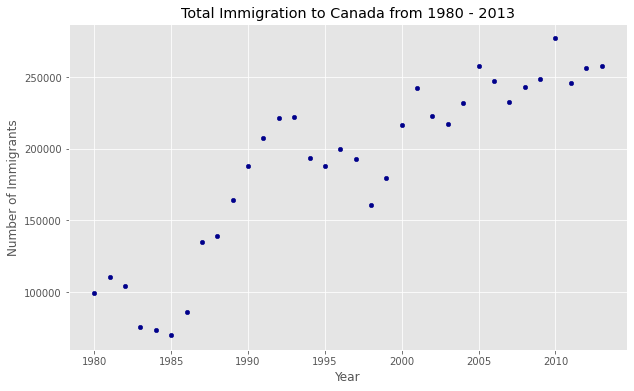

In [ ]:
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

Notice how the scatter plot does not connect the data  points together. We can clearly observe an upward trend (tendencia ascendente) in the data. Also, we can mathematically analyze this upward trend using a regression line (line of best fit).


$ \ $

-----

## ***Example (scatter plot and linear plot).***

Let's try to plot a linear line of best fit between $\text{df_total["year"]}$ and $\text{df_total["total"]}$, and use it to  predict the number of immigrants in 2015, using the following steps:

$ \ $

$\color{yellow}{\text{Step 1:}}$ Get the equation of line of best fit. We will use ***Numpy's polyfit()*** method by passing in the following:

*   $x$: the $x$-coordinates of the data.
*   $y$: the $y$-coordinates of the data.
*   $deg$: the degree of fitting polynomial( 1 = linear, 2 = quadratic, and so on).


In [ ]:
x = df_total['year']      # year on x-axis
y = df_total['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

The output is an array with the polynomial coefficients, highest powers first ( $p(x)=ax+b$). Since we are plotting a linear regression $y= a x + b$, our output has 2 elements `[5.56709228e+03, -1.09261952e+07]` with the the slope in position 0 and intercept in position 1.


$ \ $

$\color{yellow}{\text{Step 2:}}$ Plot the regression line on the `scatter plot`.

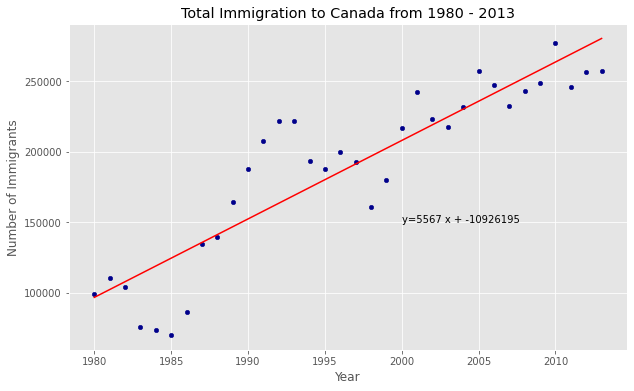

In [ ]:
# scatter plot
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
x = df_total['year']                          # year on x-axis
y = df_total['total']                         # total on y-axis
fit = np.polyfit(x, y, deg=1)
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()


$ \ $

$\color{yellow}{\text{Step 3:}}$ Using the equation of line of best fit, we can estimate the number of immigrants in 2015:


In [ ]:
fecha = 2015
numero_imigrantes = fecha * fit[0]+ fit[1]
numero_imigrantes

291495.70725744776


When compared to the actual from Citizenship and Immigration Canada's (CIC) [2016 Annual Report](http://www.cic.gc.ca/english/resources/publications/annual-report-2016/index.asp?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2022-01-01), we see that Canada accepted 271,845 immigrants in 2015. Our estimated value of 291,310 is within 7% of the actual number, which is pretty good considering our original data came from United Nations (and might differ slightly from CIC data).

As a side note, we can observe that immigration took a dip around 1993 - 1997. Further analysis into the topic revealed that in 1993 Canada introcuded Bill C-86 which introduced revisions to the refugee determination system, mostly restrictive. Further amendments to the Immigration Regulations cancelled the sponsorship required for "assisted relatives" and reduced the points awarded to them, making it more difficult for family members (other than nuclear family) to immigrate to Canada. These restrictive measures had a direct impact on the immigration numbers for the next several years.


$ \ $

-----

## ***Example (scatter plot and linear plot).***

Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013, using the following steps:

$ \ $

$\color{yellow}{\text{Step 1:}}$  Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden from the years 1980 ultil 20214. Name it **df_countries**.


In [ ]:
df_can.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


In [ ]:
#(1) Recordar que 'Denmark', 'Norway', 'Sweden' son elementos del incice de la tabla
#(2) years = list(map(str, range(1980, 2014)))

#(3) creamos el dataframe pedido dejando como columnas a 'Denmark', 'Norway', 'Sweden' y como renglones los años. Por eso realizamos la transpuesta.
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_countries.head(3)


Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222


$ \ $

$\color{yellow}{\text{Step 2:}}$  Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. Name this new dataframe **df_total**.




In [ ]:
df_total = pd.DataFrame(df_countries.sum(axis=1))
df_total.head(3)

,0
1980,669
1981,678
1982,627


$ \ $

$\color{yellow}{\text{Step 3:}}$  Reset the index in place.



In [ ]:
df_total.reset_index(inplace=True)
df_total.head()

,index,0
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


$ \ $

$\color{yellow}{\text{Step 4:}}$  Rename the columns to **year** and **total**.


In [ ]:
df_total.columns = ['year', 'total']
df_total['year'] = df_total['year'].astype(int)
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


$ \ $

$\color{yellow}{\text{Step 5:}}$  Generate the scatter plot by plotting the total versus year in **df_total**.


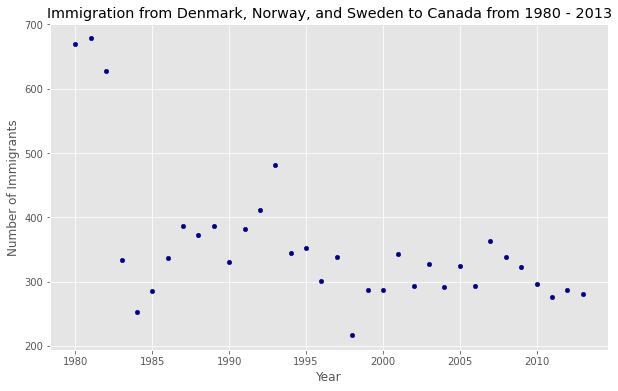

In [ ]:
# generate scatter plot
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

# add title and label to axes
plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# show plot
plt.show()


$ \ $

-----

# ***Bubble Plots.***

A `bubble plot` is a variation of the `scatter plot` that displays three dimensions of data (x, y, z). The data points are replaced with bubbles, and the size of the bubble is determined by the third variable `z`, also known as the weight. In `maplotlib`, we can pass in an array or scalar to the parameter `s` to `plot()`, that contains the weight of each point.


$ \ $

-----

## ***Note (Argentina's great depression).***


Argentina suffered a great depression from 1998 to 2002, which caused widespread (generalizada) unemployment, riots (disturbios), the fall of the government, and a default  (falta / defecto) on the country's foreign debt (deuda externa). In terms of income (ingreso), over 50% of Argentines were poor, and seven out of ten Argentine children were poor at the depth of the crisis in 2002.



$ \ $

-----

## ***Example (bubble plots).***

Let's analyze the effect of the Argentina's crisis, and compare Argentina's immigration to that of it's neighbour Brazil. Let's do that using a `bubble plot` of immigration from Brazil and Argentina for the years 1980 - 2013 using the following steps:

$ \ $

$\color{yellow}{\text{Step 1:}}$ Organizamos un nuevo dataframe que tenga la relación entre los años y los paises, teniendo en cuenta que los años describiran información en los renglones y los paises describiran información en las columnas.


In [ ]:
#(1) years = list(map(str, range(1980, 2014)))

#(2) transposed dataframe
df_can_t = df_can[years].transpose()

#(3) cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

#(4) let's label the index. This will automatically be the column name when we reset the index
(df_can_t).index.name = 'Year'

#(5) reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

#(6) view the changes
df_can_t.head()


Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


$ \ $

$\color{yellow}{\text{Step 2:}}$  Get the data for Brazil and Argentina. 

In [ ]:
df_can_t[["Argentina", "Brazil"]].head()

Country,Argentina,Brazil
0,368,211
1,426,220
2,626,192
3,241,139
4,237,145


$ \ $

$\color{yellow}{\text{Step 3:}}$  Create the normalized weights.

There are several methods of normalizations in statistics, each with its own use. In this case, we will use [feature scaling](https://en.wikipedia.org/wiki/Feature_scaling?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2022-01-01)  scaling to bring all values into the range $[0, 1]$. The general formula is 

$$X^{\prime}=\dfrac{X-X_{min}}{X_{max}-X_{min}}$$

where  $X$  is the original value,  $X^{\prime}$  is the corresponding normalized value. The formula sets the max value in the dataset to 1, and sets the min value to 0. The rest of the data points are scaled to a value between $0-1$ accordingly.

In [ ]:
#(1) normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

#(2) normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())


$ \ $

$\color{yellow}{\text{Step 4:}}$ Plot the data.

$(1)$ To plot two different scatter plots in one plot, we can include the axes one plot into the other by passing it via the `ax` parameter.


$(2)$  We will also pass in the weights using the `s` parameter. Given that the normalized weights are between 0-1, they won't be visible on the plot. Therefore, we will:

*   Multiply weights by 2000 to scale it up on the graph.

*   Add 10 to compensate for the min value (which has a 0 weight and therefore scale with $\times 2000$).


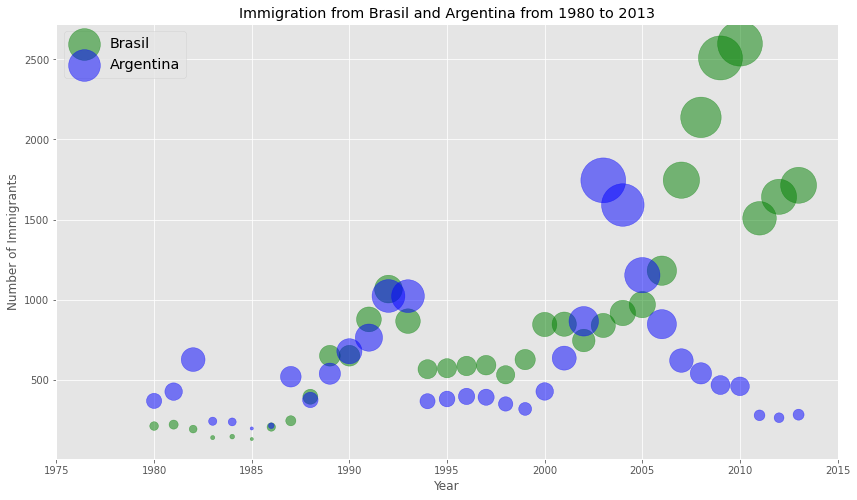

In [ ]:
# Brasil
brasil = df_can_t.plot(kind ='scatter',
                    x ='Year',
                    y ='Brazil',
                    figsize = (14, 8),
                    alpha = 0.5,  # transparency
                    color ='green',
                    s = norm_brazil * 2000 + 10,  # pass in weights 
                    xlim = (1975, 2015)
                    )

# Argentina
argentina = df_can_t.plot(kind='scatter',
                    x ='Year',
                    y ='Argentina',
                    alpha = 0.5,
                    color = "blue",
                    s = norm_argentina * 2000 + 10,
                    ax = brasil
                    )

brasil.set_ylabel('Number of Immigrants')
brasil.set_title('Immigration from Brasil and Argentina from 1980 to 2013')
brasil.legend(['Brasil', 'Argentina'], loc='upper left', fontsize='x-large')

* The size of the bubble corresponds to the magnitude of immigrating population for that year, compared to the 1980 - 2013 data. The larger the bubble is, the more immigrants are in that year.

* From the plot above, we can see a corresponding increase in immigration from Argentina during the 1998 - 2002 great depression. We can also observe a similar spike around 1985 to 1993. In fact, Argentina had suffered a great depression from 1974 to 1990, just before the onset of 1998 - 2002 great depression.

* On a similar note, Brazil suffered the *Samba Effect* where the Brazilian real (currency) dropped nearly 35% in 1999. There was a fear of a South American financial crisis as many South American countries were heavily dependent on industrial exports from Brazil. The Brazilian government subsequently adopted an austerity program, and the economy slowly recovered over the years, culminating in a surge in 2010. The immigration data reflect these events.


$ \ $ 

-----


## ***Example (bubble plots).***

Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use **df_can_t** that we defined and used in the previous example.


$ \ $

$\color{yellow}{\text{Step 1:}}$ Organizamos un nuevo dataframe que tenga la relación entre los años y los paises, teniendo en cuenta que los años describiran información en los renglones y los paises describiran información en las columnas.


In [ ]:
#(1) years = list(map(str, range(1980, 2014)))

#(2) transposed dataframe
df_can_t = df_can[years].transpose()

#(3) cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

#(4) let's label the index. This will automatically be the column name when we reset the index
(df_can_t).index.name = 'Year'

#(5) reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

#(6) view the changes
df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


$ \ $

$\color{yellow}{\text{Step 2:}}$  Get the data for China and India.

In [ ]:
df_can_t[["China", "India"]].head()

Country,China,India
0,5123,8880
1,6682,8670
2,3308,8147
3,1863,7338
4,1527,5704


$ \ $

$\color{yellow}{\text{Step 3:}}$  Create the normalized weights.

There are several methods of normalizations in statistics, each with its own use. In this case, we will use [feature scaling](https://en.wikipedia.org/wiki/Feature_scaling?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2022-01-01)  scaling to bring all values into the range $[0, 1]$. The general formula is 

$$X^{\prime}=\dfrac{X-X_{min}}{X_{max}-X_{min}}$$

where  $X$  is the original value,  $X^{\prime}$  is the corresponding normalized value. The formula sets the max value in the dataset to 1, and sets the min value to 0. The rest of the data points are scaled to a value between $0-1$ accordingly.

In [ ]:
#(1) normalize Brazil data
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())

#(2) normalize Argentina data
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())


$ \ $

$\color{yellow}{\text{Step 4:}}$ Plot the data.

$(1)$ To plot two different scatter plots in one plot, we can include the axes one plot into the other by passing it via the `ax` parameter.


$(2)$  We will also pass in the weights using the `s` parameter. Given that the normalized weights are between 0-1, they won't be visible on the plot. Therefore, we will:

*   Multiply weights by 2000 to scale it up on the graph.

*   Add 10 to compensate for the min value (which has a 0 weight and therefore scale with $\times 2000$).


 Normalize the data pertaining to China and India.

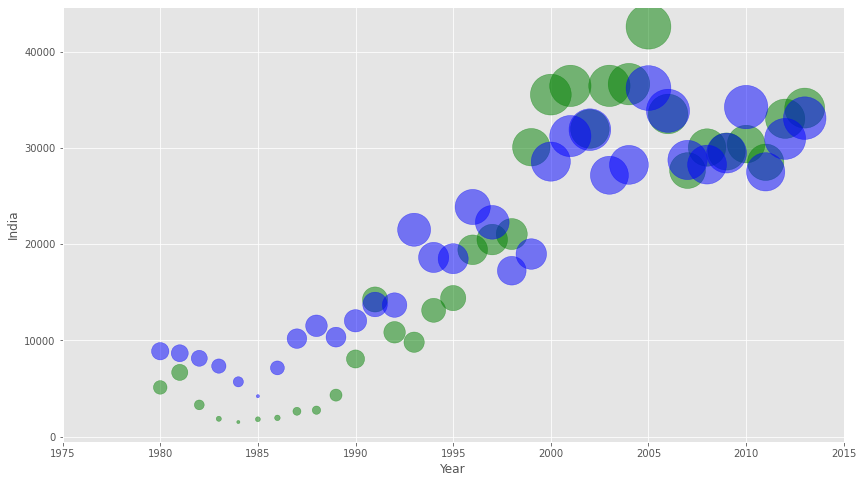

In [ ]:
# China
china = df_can_t.plot(kind ='scatter',
                    x ='Year',
                    y ='China',
                    figsize = (14, 8),
                    alpha = 0.5,  # transparency
                    color ='green',
                    s = norm_china * 2000 + 10,  # pass in weights 
                    xlim = (1975, 2015)
                    )

# India
india = df_can_t.plot(kind='scatter',
                    x ='Year',
                    y ='India',
                    alpha = 0.5,
                    color = "blue",
                    s = norm_india * 2000 + 10,
                    ax = china
                    )

brasil.set_ylabel('Number of Immigrants')
brasil.set_title('Immigration from China and India from 1980 to 2013')
brasil.legend(['China', 'India'], loc='upper left', fontsize='x-large')

